# 2023 Seçimlerini Tahmin Algoritması

### Copyright © 2022 MrvKrt
### “Bu yazılımın tüm hakları GPL lisansı altında korunmaktadır.” 
 Copyright (C) 2007 Free Software Foundation, Inc. <https://fsf.org/>
 Everyone is permitted to copy and distribute verbatim copies
 of this license document, but changing it is not allowed. https://www.gnu.org/licenses/gpl-3.0.txt
 



In [132]:
import pandas as pd
import numpy as np
import scipy.stats
%matplotlib notebook
import matplotlib.pyplot as plt
from statistics import median
from math import isnan
from itertools import filterfalse

In [88]:
#Read in the poll data
file='electionpolls.csv'
data=pd.read_csv(file, parse_dates=[1], dayfirst=True, sep=";",encoding='latin-1')

ProbAKP=[]
ProbCHP=[]
ProbHDP=[]
ProbIYI=[]
ProbMHP=[]
ProbDEVA=[]
ProbGP=[]
ProbSP=[]
ProbOTH=[]
ProbOTHER=[]

In [89]:
data

,Year,Date,Pollster,AKP,CHP,HDP,IYI,MHP,DEVA,GP,SP,OTHER
0,2018,2018-05-20,MAK,45.00,23.50,9.00,8.50,9.00,0.001,0.001,0.001,5.000
1,2018,2018-05-23,REMRES,33.30,19.40,8.70,12.60,4.40,0.001,0.001,0.001,13.200
2,2018,2018-05-23,MEDIAR,39.61,22.61,11.39,17.60,5.21,0.001,0.001,0.001,14.290
3,2018,2018-05-28,KONSENSUS,43.70,27.40,9.70,11.30,7.40,0.001,0.001,0.001,0.500
4,2018,2018-05-31,PIAR,34.80,23.40,14.10,17.20,7.30,0.001,0.001,0.001,3.200
5,2018,2018-06-03,REMRES,40.00,23.60,10.40,15.20,5.10,0.001,0.001,0.001,5.700
6,2018,2018-06-12,MEDIAR,41.51,26.27,12.12,10.73,5.81,0.001,0.001,0.001,3.560
7,2018,2018-06-18,PIAR,37.00,23.40,14.10,15.70,6.50,0.001,0.001,0.001,3.300
8,2018,2018-06-24,General elections,42.56,22.65,11.70,9.96,11.10,0.001,0.001,0.001,2.030
9,2018,2018-12-01,SONAR,40.10,25.31,10.79,14.22,7.09,0.001,0.001,0.001,2.490


In [90]:
data['OTH']=data.DEVA+data.GP+data.SP

In [91]:
cols = data.columns.tolist()
cols=['Year','Date','Pollster','AKP','CHP','HDP','IYI','MHP','DEVA','GP','SP','OTH','OTHER']
df=data[cols]
df

,Year,Date,Pollster,AKP,CHP,HDP,IYI,MHP,DEVA,GP,SP,OTH,OTHER
0,2018,2018-05-20,MAK,45.00,23.50,9.00,8.50,9.00,0.001,0.001,0.001,0.003,5.000
1,2018,2018-05-23,REMRES,33.30,19.40,8.70,12.60,4.40,0.001,0.001,0.001,0.003,13.200
2,2018,2018-05-23,MEDIAR,39.61,22.61,11.39,17.60,5.21,0.001,0.001,0.001,0.003,14.290
3,2018,2018-05-28,KONSENSUS,43.70,27.40,9.70,11.30,7.40,0.001,0.001,0.001,0.003,0.500
4,2018,2018-05-31,PIAR,34.80,23.40,14.10,17.20,7.30,0.001,0.001,0.001,0.003,3.200
5,2018,2018-06-03,REMRES,40.00,23.60,10.40,15.20,5.10,0.001,0.001,0.001,0.003,5.700
6,2018,2018-06-12,MEDIAR,41.51,26.27,12.12,10.73,5.81,0.001,0.001,0.001,0.003,3.560
7,2018,2018-06-18,PIAR,37.00,23.40,14.10,15.70,6.50,0.001,0.001,0.001,0.003,3.300
8,2018,2018-06-24,General elections,42.56,22.65,11.70,9.96,11.10,0.001,0.001,0.001,0.003,2.030
9,2018,2018-12-01,SONAR,40.10,25.31,10.79,14.22,7.09,0.001,0.001,0.001,0.003,2.490


In [92]:
dAll=[]
for index, row in df.iterrows(): dAll.append(np.array(row))

In [135]:
number= 50000

def NumpytoPandas(vektor):
    dataSize = len(vektor)
    if dataSize <= 1:
        return vektor
    else:
        return sum(vektor) / dataSize

for i in range(len(dAll)):
    vector =list(dAll[i][3:12])

    random=np.random.dirichlet(vector,number)

    postn=[]
    for i in range(number): postn.append(random[i].argmax(axis=0))
    postn=np.array(postn)
    
    AKP=100*len(np.where(postn ==0)[0])/number
    ProbAKP.append(df.AKP)
    
    CHP=100*len(np.where(postn ==1)[0])/number
    ProbCHP.append(df.CHP)
    
    HDP=100*len(np.where(postn ==2)[0])/number
    ProbHDP.append(df.HDP)
    
    IYI=100*len(np.where(postn ==3)[0])/number
    ProbIYI.append(df.IYI)

    MHP=100*len(np.where(postn ==4)[0])/number
    ProbMHP.append(df.MHP)
    
    DEVA=100*len(np.where(postn ==5)[0])/number
    ProbHDP.append(df.DEVA)

    GP=100*len(np.where(postn ==6)[0])/number
    ProbIYI.append(df.GP)

    SP=100*len(np.where(postn ==7)[0])/number
    ProbMHP.append(df.SP)
    
    SP=100*len(np.where(postn ==8)[0])/number
    ProbOTH.append(df.OTH)

#Probability of victory for each party
    setprint=False
    if setprint == True:
        print('akp',AKP,'%')
        print('chp',CHP,'%')
        print('HDP',HDP,'%')
        print('IYI',IYI,'%')
        print('MHP',MHP,'%')
        print('DEVA',HDP,'%')
        print('GP',IYI,'%')
        print('SP',MHP,'%')
        print('OTH', OTH, '%')

In [96]:
ProbAKP[-1]=100
ProbCHP[-1]=0

In [137]:
akp = NumpytoPandas(ProbAKP)
chp = NumpytoPandas(ProbCHP)
hdp = NumpytoPandas(ProbHDP)
mhp = NumpytoPandas(ProbMHP)
iyi = NumpytoPandas(ProbIYI)
diger = NumpytoPandas(ProbOTH)

In [138]:
pd.Series.median(akp)

32.8674603174603

In [139]:
pd.Series.median(chp)

25.055178571428627

In [140]:
pd.Series.median(mhp)

3.6754999999999907

In [141]:
pd.Series.median(iyi)

7.500250000000021

In [142]:
pd.Series.median(hdp)

5.772749999999983

In [143]:
pd.Series.median(diger)

4.20049999999999

In [152]:
cumhur = pd.Series.median(akp+mhp)
cumhur

35.8667182539682

In [153]:
millet = pd.Series.median(chp+iyi+diger)
millet

37.7430555555557

<IPython.core.display.Javascript object>


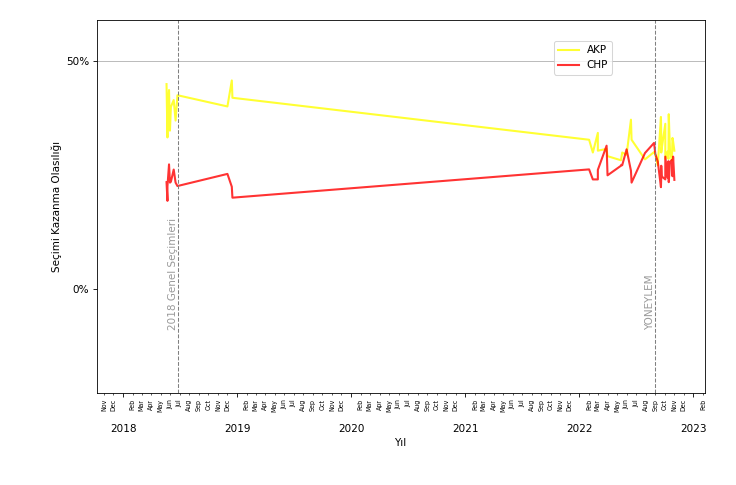

In [156]:
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as mtick

x=pd.to_datetime(df.Date)
fig, ax = plt.subplots()
ax.xaxis_date()

fmt = '%.0f%%' # Format for ticks e.g. '40%'

import matplotlib.dates as mdates
    
years = mdates.YearLocator()
months = mdates.MonthLocator()
monthsFmt = mdates.DateFormatter('%b') 
yearsFmt = mdates.DateFormatter('\n\n%Y')  # add some space for the year label
    

ax.xaxis.set_minor_locator(months)
ax.xaxis.set_minor_formatter(monthsFmt)
plt.setp(ax.xaxis.get_minorticklabels(), rotation=90,size=6)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)


plt.plot(x,df.AKP,linestyle='-',color='yellow',linewidth=2,label='AKP',alpha=0.8)
plt.plot(x,df.CHP,linestyle='-',color='red',linewidth=2,label='CHP',alpha=0.8)
#plt.plot(x,ProbAD,linestyle='-',color='green',linewidth=2,label='AD',alpha=0.8)
#AD's chances are zero in any simulation. I am not plotting their probability or it would needlessly clutter the graph
plt.legend(bbox_to_anchor=(0.3, 0.9, 1, 0), loc='center',
           ncol=1, mode="compact", borderaxespad=0)
plt.axhline(y=50,linewidth=0.5, color = 'gray')
plt.yticks(np.arange(0,150,50))
plt.xlabel('Yıl')
plt.ylabel('Seçimi Kazanma Olasılığı')

label_list = [
    (pd.to_datetime('2018-06-27'), '2018 Genel Seçimleri', 'grey'),
    (pd.to_datetime('2022-09-01'), 'YONEYLEM', 'grey'),
    #(pd.to_datetime('2016-02-03'), 'ORC', 'grey')
]
ax = plt.gca()

for date_point, label, clr in label_list:
    plt.axvline(x=date_point, color=clr,linestyle='--', linewidth=1)
    plt.text(date_point, ax.get_ylim()[1]-109, label,
             horizontalalignment='right',
             verticalalignment='bottom',
             rotation=90,
             color=clr,
            alpha=0.8)
    
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
plt.tight_layout()
plt.show()